In [92]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [93]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [94]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [95]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [96]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [97]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [98]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [99]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [100]:
#Measurement's column name and type
inspector = inspect(engine)
m_columns = inspector.get_columns('measurement')
for c in m_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [101]:
#Station's column name and type
s_columns = inspector.get_columns('station')
for c in s_columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent)


('2017-08-23',)


In [103]:
# Calculate the date one year from the last date in data set.
_1yearbefore = dt.date(2017, 8,23)- dt.timedelta(weeks=52)
print(_1yearbefore)

2016-08-24


In [107]:
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names

_prcp = pd.read_sql(
    'SELECT prcp, date FROM Measurement WHERE date BETWEEN "2016-08-24" AND "2017-08-23"', conn)

_prcp.set_index('date', inplace=True)
_prcp.sort_index(inplace=True)
_prcp.head()

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15


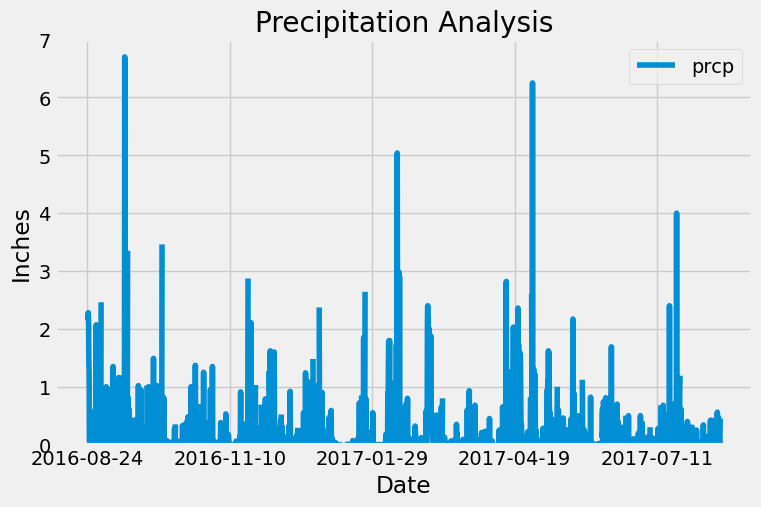

<Figure size 640x480 with 0 Axes>

In [108]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_graph = _prcp.plot( ylim=(0,7), figsize= (8,5), title='Precipitation Analysis')

precipitation_graph.set_xlabel('Date')
precipitation_graph.set_ylabel('Inches')

plt.show()
plt.tight_layout()

In [109]:
# Use Pandas to calculate the summary statistics for the precipitation data
_prcp.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [52]:
# Design a query to calculate the total number of stations in the dataset
num = session.query(Station.station).count()
print(num)

9


In [114]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
busy_station = pd.read_sql('SELECT station, COUNT(station) FROM Measurement GROUP BY station ORDER BY COUNT(station) DESC', conn)
activity_DF = busy_station.rename(columns ={"station":"Station", 'COUNT(station)':'Station_Activity'})
activity_DF


,Station,Station_Activity
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [117]:
#Determine the Busiest station and its Total Activity
max_activity = activity_DF['Station_Activity'].max()
busiest_s = activity_DF.iloc[0,0]
print("Busiest Station:  ", busiest_s, " Total Activity: ", max_activity)

Busiest Station:   USC00519281  Total Activity:  2772


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Lowest


#Highest


#Average

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

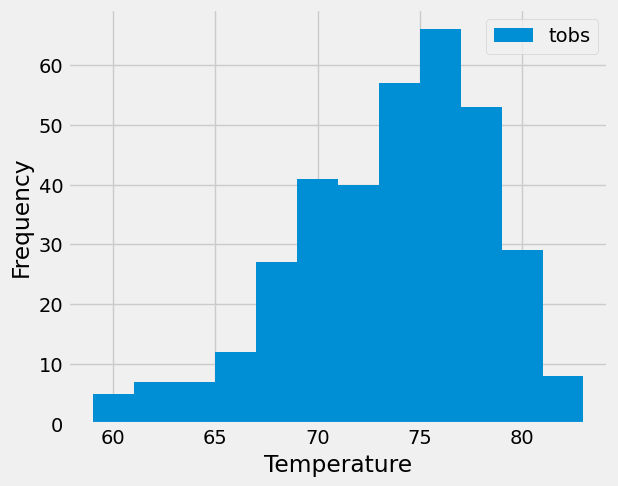

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()